<a href="https://colab.research.google.com/github/seungjun02/reinforcement-Learning/blob/main/chapter2/2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

표본평균 방법을 비정상적(nonstationary)문데에 적용하기 어렵다는 점을 보여주는 실험을 보여주고 설계해라

In [7]:
#동일한 초깃값으로 시작

import numpy as np

q = np.full(10, 5)
print(q)

[5 5 5 5 5 5 5 5 5 5]


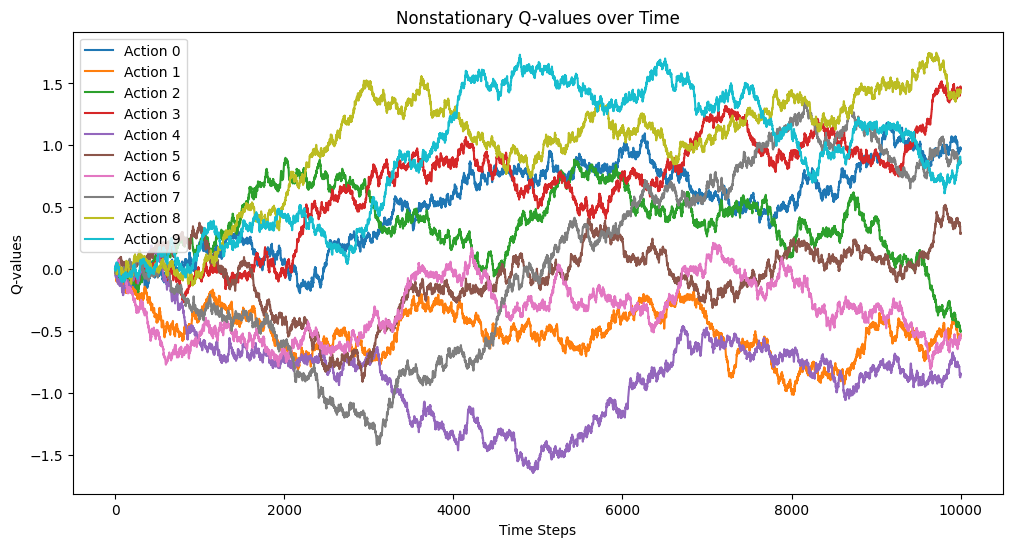

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 초기값 설정
num_actions = 10  # 10개의 행동(Q 값)
num_steps = 10000  # 10000 단계
initial_values = np.full(num_actions, 0.0)  # 초기값 0

# 결과 저장
q_values = np.zeros((num_steps, num_actions))
q_values[0] = initial_values

# 시뮬레이션
for t in range(1, num_steps):
    q_values[t] = q_values[t-1] + np.random.normal(0, 0.01, size=num_actions)





# 결과 시각화
plt.figure(figsize=(12, 6))
for i in range(num_actions):
    plt.plot(q_values[:, i], label=f"Action {i}")

plt.xlabel("Time Steps")
plt.ylabel("Q-values")
plt.title("Nonstationary Q-values over Time")
plt.legend()
plt.show()


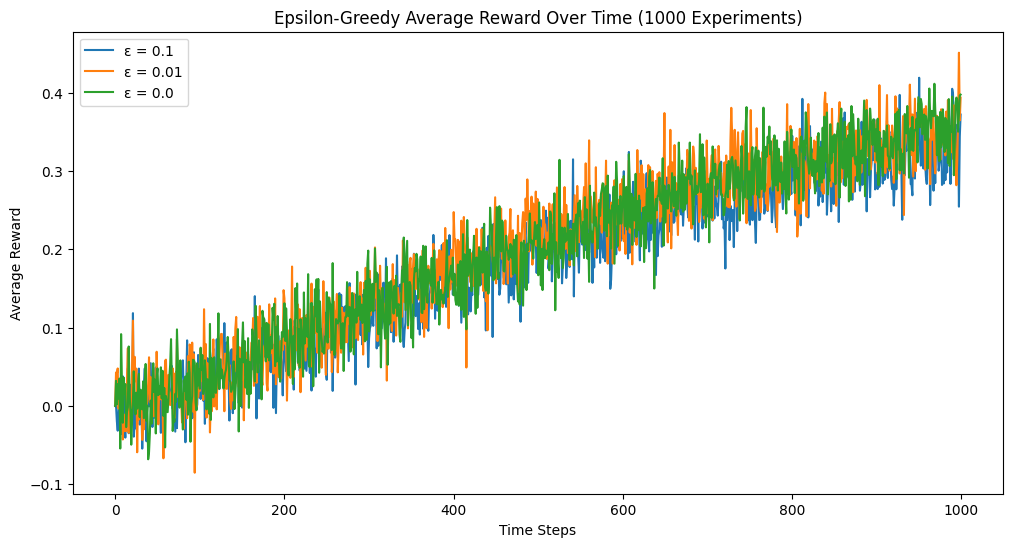

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 설정값
num_actions = 10  # 행동 개수
num_steps = 1000  # 시간 단계
num_experiments = 1000  # 반복 실험 횟수
epsilons = [0.1, 0.01, 0.0]  # 입실론 값들
alpha = 0.1  # 고정 학습률

# 평균 보상 저장 (각 입실론 별)
avg_rewards = {eps: np.zeros(num_steps) for eps in epsilons}

# 2000번 실험 수행
for _ in range(num_experiments):
    for epsilon in epsilons:
        # 환경 초기화
        q_values = np.zeros((num_steps, num_actions))  # 실제 Q 값
        q_values[0] = np.full(num_actions, 0.0)  # 초기값 0

        q_a = np.zeros(num_actions)  # Q 추정값 (고정 학습률)

        # 시뮬레이션 시작
        for t in range(1, num_steps):
            # Q 값 변화 (Nonstationary 환경)
            q_values[t] = q_values[t-1] + np.random.normal(0, 0.01, size=num_actions)

            # 입실론 탐욕적 행동 선택
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)  # 무작위 행동
            else:
                action = np.argmax(q_a)  # 최적 행동

            # 보상 획득
            reward = np.random.normal(q_values[t, action], 1)  # 평균이 실제 Q 값인 정규분포

            # 고정 학습률 방식으로 Q 업데이트
            q_a[action] += alpha * (reward - q_a[action])

            # 평균 보상 기록 (각 단계에서 평균을 계산하기 위해 누적)
            avg_rewards[epsilon][t] += reward

# 평균 보상 계산 (2000번 반복 실행의 평균)
for epsilon in epsilons:
    avg_rewards[epsilon] /= num_experiments

# 결과 시각화
plt.figure(figsize=(12, 6))
for epsilon in epsilons:
    plt.plot(avg_rewards[epsilon], label=f"ε = {epsilon}")

plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Average Reward Over Time (1000 Experiments)")
plt.legend()
plt.show()

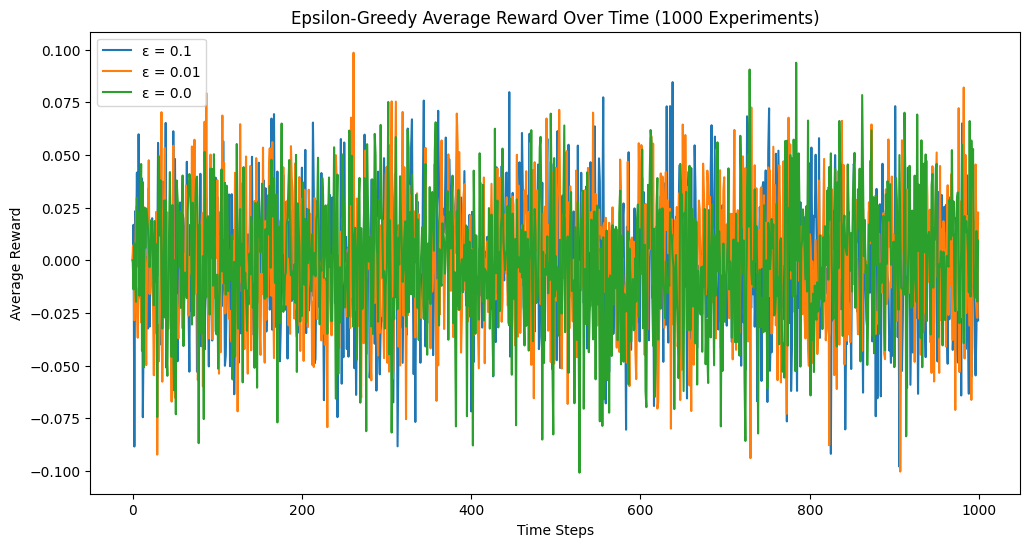

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 설정값
num_actions = 10  # 행동 개수
num_steps = 1000  # 시간 단계
num_experiments = 1000  # 반복 실험 횟수
epsilons = [0.1, 0.01, 0.0]  # 입실론 값들
alpha = 0.1  # 고정 학습률

# 평균 보상 저장 (각 입실론 별)
avg_rewards = {eps: np.zeros(num_steps) for eps in epsilons}

# 1000번 실험 수행
for _ in range(num_experiments):
    for epsilon in epsilons:
        # 환경 초기화
        q_values = np.zeros((num_steps, num_actions))  # 실제 Q 값
        q_values[0] = np.full(num_actions, 0.0)  # 초기값 0
        # 행동 선택 횟수
        action_counts = np.zeros(num_actions)

        q_n = np.zeros(num_actions)  # Q 추정값 (고정 학습률)

        # 시뮬레이션 시작
        for t in range(1, num_steps):
            # Q 값 변화 (Nonstationary 환경)
            q_values[t] = q_values[t-1] + np.random.normal(0, 0.01, size=num_actions)

            # 입실론 탐욕적 행동 선택
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)  # 무작위 행동
            else:
                action = np.argmax(q_n)  # 최적 행동

            # 보상 획득
            reward = np.random.normal(q_values[t, action], 1)  # 평균이 실제 Q 값인 정규분포

            # 표본평균 방식으로 Q 업데이트
            action_counts[action] += 1
            q_a[action] += (reward - q_a[action]) / action_counts[action]

            # 평균 보상 기록 (각 단계에서 평균을 계산하기 위해 누적)
            avg_rewards[epsilon][t] += reward

# 평균 보상 계산 (1000번 반복 실행의 평균)
for epsilon in epsilons:
    avg_rewards[epsilon] /= num_experiments

# 결과 시각화
plt.figure(figsize=(12, 6))
for epsilon in epsilons:
    plt.plot(avg_rewards[epsilon], label=f"ε = {epsilon}")

plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Average Reward Over Time (1000 Experiments)")
plt.legend()
plt.show()